---

# THIS IS AN EXPERIMENT FOR THE IMPROVEMENT SECTION

## BRIEF SUMMARY: WE USE ALL THE ENTRIES INSTEAD OF USING ONLY AUGUST DATA.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

In [3]:
pd.set_option('display.max_columns', None)

---

## Load Data

100,000 Entries with 28 columns

In [4]:
df = pd.read_csv('data/credit_raw.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

/var/folders/h_/lxrkd3yx3w11tnfvg06j7l140000gn/T/ipykernel_12212/606350316.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/credit_raw.csv')


In [5]:
df.isnull().sum().sum()

60071

In [6]:
# Checking duplicates before we start :)

df.duplicated().sum()

0

In [7]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


---

## 1. Drop the variable 'Month'


In [8]:
# Drop 'Month' column

df.drop(columns='Month', inplace=True)
df.shape

(100000, 27)

Must drop all variables that are related to time-series (Monthly influenced data)

'Monthly_Inhand_Salary', 'Changed_Credit_Limit', 'Payment_of_Min_Amount', 

'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'

In [9]:
df.drop(columns=['Monthly_Inhand_Salary', 'Changed_Credit_Limit', 'Payment_of_Min_Amount',
                 'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
                 inplace=True)


In [10]:
df.columns

Index(['ID', 'Customer_ID', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Credit_Score'],
      dtype='object')

---

## 2. Drop Idenfication Variables

Drop 4 Columns : 'ID', 'Customer_ID', 'Name', 'SSN'



In [11]:
df.drop(columns= ['ID', 'Customer_ID', 'Name', 'SSN'], inplace=True)
df.columns

Index(['Age', 'Occupation', 'Annual_Income', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries',
       'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Credit_Score'],
      dtype='object')

---

## 3. Drop Null Values

In [12]:
df.isnull().sum()

Age                             0
Occupation                      0
Annual_Income                   0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Credit_Score                    0
dtype: int64

#### Before we drop the rows with null values drop the unnecessary variables (with null values)

In [13]:
df.Type_of_Loan.unique()

array(['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
       'Credit-Builder Loan', 'Auto Loan, Auto Loan, and Not Specified',
       ..., 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan',
       'Payday Loan, Student Loan, Mortgage Loan, and Not Specified',
       'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan'],
      dtype=object)

In [14]:
# Drop the column since we have Num_of_Loan

df.drop(columns='Type_of_Loan', inplace=True)
df.shape

(100000, 15)

The other variables seem important...

In [15]:
df.dropna(inplace=True)
df.shape

(82950, 15)

In [16]:
# Reset Index (Rows have been manipulated)

df.reset_index(drop=True, inplace=True)
df.index

RangeIndex(start=0, stop=82950, step=1)

---

## 4. Age


In [17]:
# Seems like there are wrong values

df.Age.nunique()

1534

In [18]:
# Type should be integer, but it's a string (object)

df.Age.dtype

dtype('O')

In [19]:
df.Age

0          23
1        -500
2          23
3          23
4          23
         ... 
82945      25
82946      25
82947      25
82948      25
82949      25
Name: Age, Length: 82950, dtype: object

In [20]:
# Extract only the numbers and change the type to integer.

df.Age = df.Age.map(lambda x: int(''.join(re.findall(r'\d+', x))))
df.Age.head()

0     23
1    500
2     23
3     23
4     23
Name: Age, dtype: int64

In [21]:
df.Age.value_counts(normalize=True, bins=5)

(5.3149999999999995, 1750.8]    0.984882
(5224.4, 6961.2]                0.003990
(3487.6, 5224.4]                0.003797
(1750.8, 3487.6]                0.003713
(6961.2, 8698.0]                0.003617
Name: Age, dtype: float64

In [22]:
print(df.Age.min())
print(df.Age.max())

14
8698


In [23]:
# Observations with age under 21 should be considered wrong data => Based on jobs, credit history age, etc.

df.loc[df.Age<21].shape

(11376, 15)

In [24]:
# Age is higher than 20 and lower than 100

print(df.loc[df.Age>=100].shape)
df = df.loc[(df.Age>20) & (df.Age<=100)]
df.reset_index(drop=True, inplace=True)
print(df.shape)

(2324, 15)
(69251, 15)


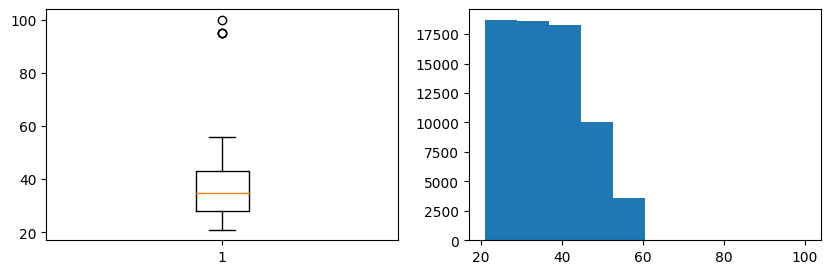

In [25]:
# Looks good

plt.figure(figsize=(10,3))

plt.subplot(1, 2, 1)
plt.boxplot(df.Age)

plt.subplot(1, 2, 2)
plt.hist(df.Age)

plt.show()

---

## 5. Occupation

In [26]:
# 631 null values.

df.Occupation.value_counts()

_______          4882
Lawyer           4602
Mechanic         4412
Scientist        4397
Accountant       4375
Architect        4354
Entrepreneur     4311
Developer        4294
Journalist       4271
Media_Manager    4262
Doctor           4255
Engineer         4244
Teacher          4189
Musician         4169
Writer           4139
Manager          4095
Name: Occupation, dtype: int64

In [27]:
# Drop Occupation => Too many unique values => Consider dummy coding

df.drop(columns='Occupation', inplace=True)
df.shape

(69251, 14)

---

## 6. Annual_Income

In [28]:
# Leave only the numbers and decimal point
# Round it to integer

df.Annual_Income = df.Annual_Income.map(lambda x: int(float(''.join(re.findall(r'\d+\.\d+', x)))))
df.Annual_Income

0        19114
1        19114
2        19114
3        19114
4        34847
         ...  
69246    39628
69247    39628
69248    39628
69249    39628
69250    39628
Name: Annual_Income, Length: 69251, dtype: int64

In [29]:
# Outliers

df.Annual_Income.value_counts(normalize=True, bins=5)

(-17185.057, 4845217.2]     0.991856
(14521639.6, 19359850.8]    0.002296
(19359850.8, 24198062.0]    0.002282
(9683428.4, 14521639.6]     0.001863
(4845217.2, 9683428.4]      0.001704
Name: Annual_Income, dtype: float64

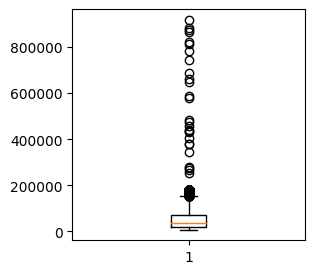

In [30]:
plt.figure(figsize=(3,3))
plt.boxplot(df.Annual_Income.loc[df.Annual_Income<=1000000])
plt.show()

In [31]:
# Outliers => Cutoff at 200,000 US Dollars

print(df.Annual_Income.loc[df.Annual_Income>=200000].__len__())

df = df.loc[df.Annual_Income<=200000]
df.reset_index(drop=True, inplace=True)
df.shape

680


(68571, 14)

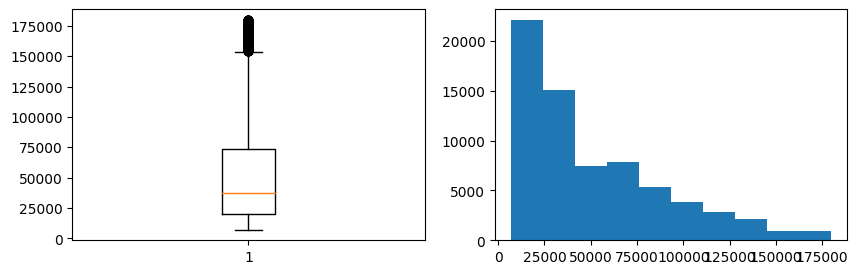

In [32]:
# Not bad for now

plt.figure(figsize=(10,3))

plt.subplot(1, 2, 1)
plt.boxplot(df.Annual_Income)

plt.subplot(1, 2, 2)
plt.hist(df.Annual_Income)

plt.show()

---

## 7. Num_Bank_Accounts

In [33]:
# Number of bank accounts distribution

df.Num_Bank_Accounts.value_counts(normalize=True, bins=5)

(-2.8, 358.8]       0.989194
(718.6, 1078.4]     0.002844
(358.8, 718.6]      0.002683
(1438.2, 1798.0]    0.002683
(1078.4, 1438.2]    0.002596
Name: Num_Bank_Accounts, dtype: float64

In [34]:
# Under 100

df.Num_Bank_Accounts.loc[df.Num_Bank_Accounts<=100].value_counts(normalize=True, bins=5)

(-1.101, 19.0]    0.999365
(19.0, 39.0]      0.000251
(39.0, 59.0]      0.000162
(59.0, 79.0]      0.000133
(79.0, 99.0]      0.000089
Name: Num_Bank_Accounts, dtype: float64

In [35]:
# Drop outliers

df = df.loc[df.Num_Bank_Accounts < 12]
df.shape

(67650, 14)

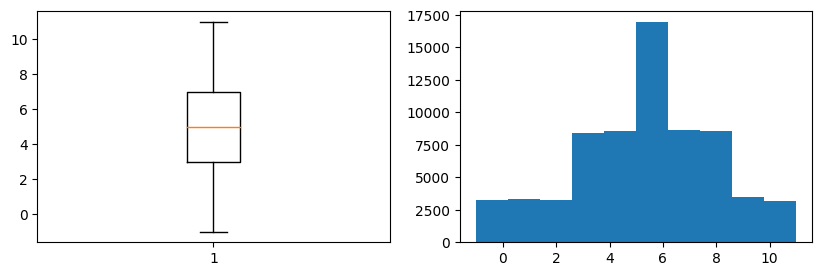

In [36]:
# Looks Good

plt.figure(figsize=(10,3))

plt.subplot(1, 2, 1)
plt.boxplot(df.Num_Bank_Accounts)

plt.subplot(1, 2, 2)
plt.hist(df.Num_Bank_Accounts)

plt.show()

---

## 8. Num_Credit_Card

In [37]:
# Number of credit card distribution

df.Num_Credit_Card.value_counts(normalize=True, bins=5)

(-1.5, 299.8]       0.981981
(599.6, 899.4]      0.004715
(299.8, 599.6]      0.004464
(899.4, 1199.2]     0.004420
(1199.2, 1499.0]    0.004420
Name: Num_Credit_Card, dtype: float64

In [38]:
# Under 100

df.Num_Credit_Card.loc[df.Num_Credit_Card<=100].value_counts(normalize=True, bins=5)

(-0.101, 20.0]    0.998580
(20.0, 40.0]      0.000408
(60.0, 80.0]      0.000408
(80.0, 100.0]     0.000347
(40.0, 60.0]      0.000257
Name: Num_Credit_Card, dtype: float64

In [39]:
# Drop outliers

df = df.loc[df.Num_Credit_Card <= 20]
df.shape

(66102, 14)

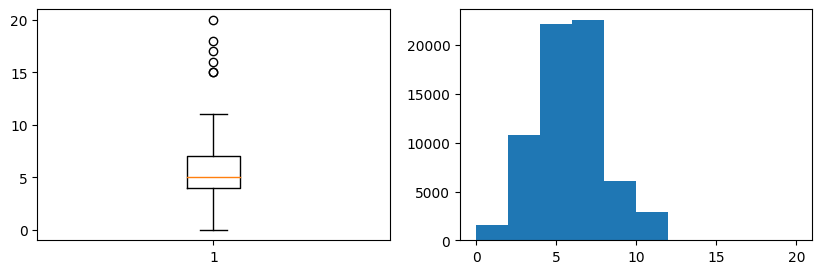

In [40]:
# Looks Good

plt.figure(figsize=(10,3))

plt.subplot(1, 2, 1)
plt.boxplot(df.Num_Credit_Card)

plt.subplot(1, 2, 2)
plt.hist(df.Num_Credit_Card)

plt.show()

---

## 9. Interest_Rate

In [41]:
print(df.Interest_Rate.dtype)

# Interest rate distribution

df.Interest_Rate.value_counts(normalize=True, bins=5)

int64


(-4.797000000000001, 1160.2]    0.983344
(3478.6, 4637.8]                0.004508
(1160.2, 2319.4]                0.004190
(4637.8, 5797.0]                0.004039
(2319.4, 3478.6]                0.003918
Name: Interest_Rate, dtype: float64

In [42]:
# Under 100

df.Interest_Rate.loc[df.Interest_Rate<=100].value_counts(normalize=True, bins=5)

(0.9, 20.8]      0.789068
(20.8, 40.6]     0.210654
(80.2, 100.0]    0.000139
(60.4, 80.2]     0.000124
(40.6, 60.4]     0.000015
Name: Interest_Rate, dtype: float64

In [43]:
# Drop outliers

df = df.loc[df.Interest_Rate <= 41]
df.shape

(64728, 14)

In [44]:
# Interest_Rate column seems like it is written in percentage => Divide it by 100

df.Interest_Rate = df.Interest_Rate.map(lambda x : x / 100)
df.Interest_Rate.head()

0    0.03
1    0.03
2    0.03
3    0.03
4    0.06
Name: Interest_Rate, dtype: float64

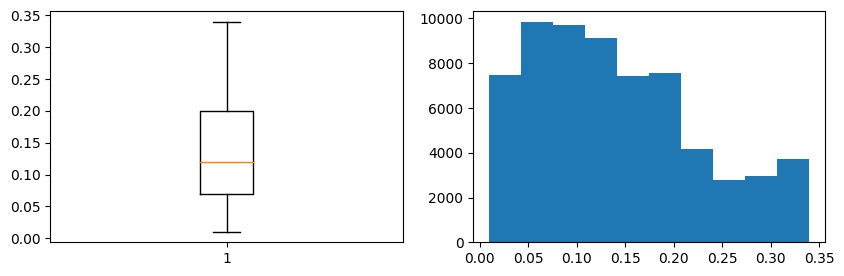

In [45]:
# Looks Good

plt.figure(figsize=(10,3))

plt.subplot(1, 2, 1)
plt.boxplot(df.Interest_Rate)

plt.subplot(1, 2, 2)
plt.hist(df.Interest_Rate)

plt.show()

---

## 10. Num_of_Loan

In [46]:
print(df.Num_of_Loan.dtype)

object


In [47]:
# Leave only integer

df.Num_of_Loan = df.Num_of_Loan.map(lambda x: int(''.join(re.findall(r'\d+', x))))
df.Num_of_Loan.value_counts(normalize=True, bins=5)

(-1.486, 297.0]     0.996431
(1188.0, 1485.0]    0.000973
(891.0, 1188.0]     0.000927
(594.0, 891.0]      0.000850
(297.0, 594.0]      0.000819
Name: Num_of_Loan, dtype: float64

In [48]:
# Under 100

df.Num_of_Loan.loc[df.Num_of_Loan<=100].value_counts(normalize=True, bins=5).sort_index()

(-0.101, 20.0]    0.960326
(20.0, 40.0]      0.000093
(40.0, 60.0]      0.000140
(60.0, 80.0]      0.000031
(80.0, 100.0]     0.039410
Name: Num_of_Loan, dtype: float64

In [49]:
# Drop outliers

df = df.loc[df.Num_of_Loan <= 21]
df.shape

(61893, 14)

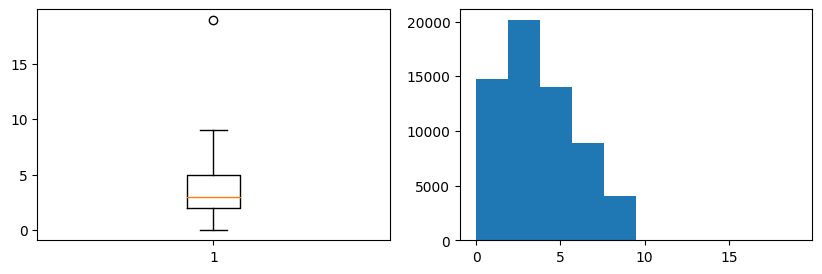

In [50]:
# Looks Good

plt.figure(figsize=(10,3))

plt.subplot(1, 2, 1)
plt.boxplot(df.Num_of_Loan)

plt.subplot(1, 2, 2)
plt.hist(df.Num_of_Loan)

plt.show()

---

## 11. Delay_from_due_date

In [51]:
df.Delay_from_due_date.unique()

array([ 3,  5,  8,  7, 13, 10,  0,  1,  9, -1, 30, 31, 34, 27, 14, 11,  2,
       -2, 16, 17,  4, 15, 23, 22, 12, 18, 19, 51, 53, 48, 43, 52, 25, 20,
       46, 49, 28, 61, 26, 29, 45,  6, 55, 56, 59, 62, 67, 54, 57, 21, 24,
       65, 41, 39, 47, 42, 33, 35, 36, 38, -3, 60, 63, 50, 44, 40, 64, 32,
       37, -5, 58, -4, 66])

In [52]:
df.Delay_from_due_date.dtype

dtype('int64')

In [53]:
# Change negative values to 0
# Reason: This column represents the average number of days delayed from the payment date.
# If you're average is negative, it means there was no delay (Early payment) = 0

df.Delay_from_due_date = df.Delay_from_due_date.map(lambda x : 0 if x < 0 else x)
df.Delay_from_due_date.unique()

array([ 3,  5,  8,  7, 13, 10,  0,  1,  9, 30, 31, 34, 27, 14, 11,  2, 16,
       17,  4, 15, 23, 22, 12, 18, 19, 51, 53, 48, 43, 52, 25, 20, 46, 49,
       28, 61, 26, 29, 45,  6, 55, 56, 59, 62, 67, 54, 57, 21, 24, 65, 41,
       39, 47, 42, 33, 35, 36, 38, 60, 63, 50, 44, 40, 64, 32, 37, 58, 66])

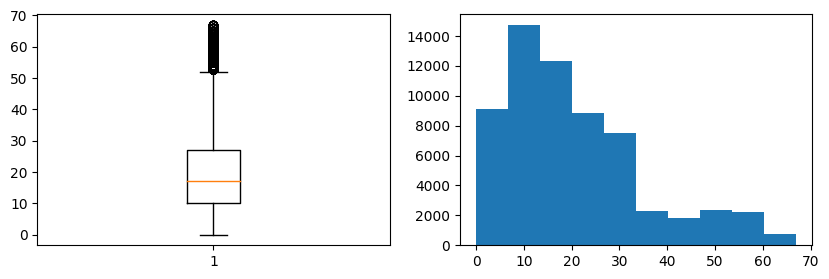

In [54]:
# Looks Alright

plt.figure(figsize=(10,3))

plt.subplot(1, 2, 1)
plt.boxplot(df.Delay_from_due_date)

plt.subplot(1, 2, 2)
plt.hist(df.Delay_from_due_date)

plt.show()

---

## 12. Num_of_Delayed_Payment

In [55]:
# NOTE: This column is very similar to one above (Delay_from_due_date). Might drop it later.

In [56]:
df.Num_of_Delayed_Payment.unique()

array(['7', '4', '8_', '1', '3_', '0', '8', '6', '5', '3', '9', '15',
       '17', '2', '14', '11', '20', '22', '10', '13', '13_', '14_', '16',
       '12', '12_', '18', '19', '23', '24', '21', '3318', '3083', '1338',
       '26', '11_', '25', '183_', '-1', '10_', '22_', '19_', '23_',
       '2672', '20_', '4_', '2008', '538', '6_', '1_', '16_', '3478',
       '2420', '15_', '707', '26_', '18_', '28', '17_', '27', '5_', '-2',
       '1867', '2250', '1463', '-3', '7_', '1941', '2655', '306', '9_',
       '0_', '3539', '3684', '1823', '1946', '827', '2297', '2566',
       '2503', '2812', '1697', '851', '3905', '923', '1668', '3253',
       '21_', '2689', '3858', '642', '3457', '3154', '3037', '3103', '2_',
       '1063', '1841', '2569_', '25_', '211', '793', '3484', '3491',
       '3050', '2162', '27_', '1718', '3855', '84', '3251', '1832',
       '4069', '3010', '733', '4241', '166', '24_', '2461', '1749',
       '3200', '2185', '4161', '3009', '359', '2015', '1523', '594',
       '1079

In [57]:
# Leave only integer

df.Num_of_Delayed_Payment = df.Num_of_Delayed_Payment.map(lambda x: int(''.join(re.findall(r'\d+', x))))

In [58]:
df.Num_of_Delayed_Payment.value_counts(normalize=True, bins=5)

(-4.398000000000001, 879.4]    0.993537
(1758.8, 2638.2]               0.001890
(879.4, 1758.8]                0.001535
(2638.2, 3517.6]               0.001535
(3517.6, 4397.0]               0.001503
Name: Num_of_Delayed_Payment, dtype: float64

In [59]:
# Under 100

df.Num_of_Delayed_Payment.loc[df.Num_of_Delayed_Payment<=100].value_counts(normalize=True, bins=5).sort_index()

(-0.095, 18.8]    0.781302
(18.8, 37.6]      0.218600
(37.6, 56.4]      0.000016
(56.4, 75.2]      0.000016
(75.2, 94.0]      0.000065
Name: Num_of_Delayed_Payment, dtype: float64

In [60]:
df.shape

(61893, 14)

In [61]:
# Drop outliers

df = df.loc[df.Num_of_Delayed_Payment <= 28]
df.shape

(61403, 14)

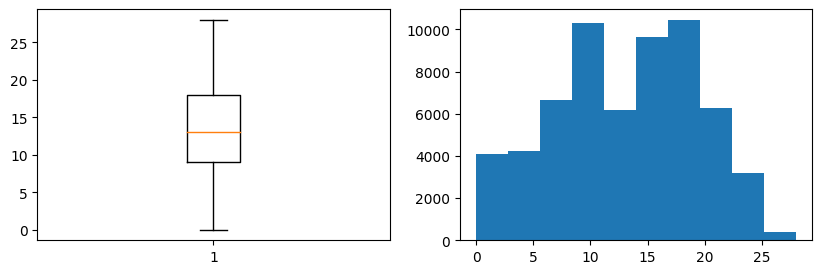

In [62]:
# Looks Good

plt.figure(figsize=(10,3))

plt.subplot(1, 2, 1)
plt.boxplot(df.Num_of_Delayed_Payment)

plt.subplot(1, 2, 2)
plt.hist(df.Num_of_Delayed_Payment)

plt.show()

---

## 13. Num_Credit_Inquiries

In [63]:
# Change floats to integer

print(df.Num_Credit_Inquiries.dtype)
df.Num_Credit_Inquiries = df.Num_Credit_Inquiries.astype(int)

float64


In [64]:
df.Num_Credit_Inquiries.value_counts(normalize=True, bins=5)

(-2.593, 518.4]     0.986597
(1036.8, 1555.2]    0.003925
(518.4, 1036.8]     0.003387
(2073.6, 2592.0]    0.003241
(1555.2, 2073.6]    0.002850
Name: Num_Credit_Inquiries, dtype: float64

In [65]:
# Under 100

df.Num_Credit_Inquiries.loc[df.Num_Credit_Inquiries<=100].value_counts(normalize=True, bins=5).sort_index()

(-0.088, 17.4]    0.999570
(17.4, 34.8]      0.000066
(34.8, 52.2]      0.000083
(52.2, 69.6]      0.000149
(69.6, 87.0]      0.000132
Name: Num_Credit_Inquiries, dtype: float64

In [66]:
df.shape

(61403, 14)

In [67]:
# Drop outliers

df = df.loc[df.Num_Credit_Inquiries <= 16]
df.shape

(60232, 14)

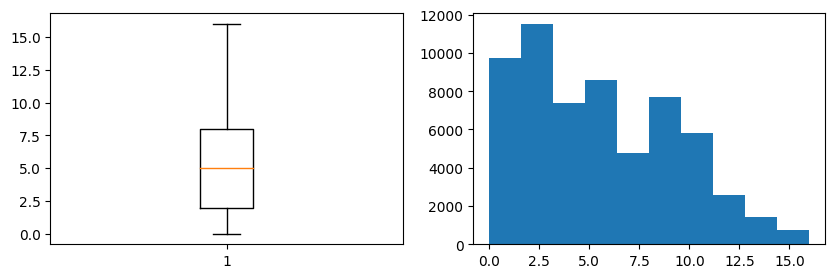

In [68]:
# Looks Good

plt.figure(figsize=(10,3))

plt.subplot(1, 2, 1)
plt.boxplot(df.Num_Credit_Inquiries)

plt.subplot(1, 2, 2)
plt.hist(df.Num_Credit_Inquiries)

plt.show()

---

## 14. Credit_Mix

In [69]:
df.Credit_Mix.unique()

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

In [70]:
# Null Values

df.loc[df.Credit_Mix == '_'].__len__()

12332

In [71]:
df.shape

(60232, 14)

In [72]:
# NOTE Should I drop this? There are many observations... Let's drop it for now

df = df.loc[df.Credit_Mix != '_']
df.shape

(47900, 14)

In [73]:
# Reset Index (Rows have been manipulated)

df.reset_index(drop=True, inplace=True)
df.index

RangeIndex(start=0, stop=47900, step=1)

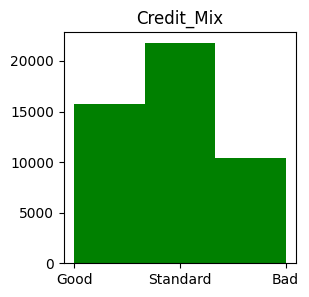

In [74]:
plt.figure(figsize=(3,3))
plt.hist(df.Credit_Mix, bins=3,color='green')
plt.title('Credit_Mix')
plt.show()

---

## 15. Outstanding_Debt

In [75]:
df.Outstanding_Debt.unique()

array(['809.98', '605.03', '1303.01', ..., '3571.7_', '3571.7', '502.38'],
      dtype=object)

In [76]:
# Leave only the numbers and decimal point
# Round it to integer

df.Outstanding_Debt = df.Outstanding_Debt.map(lambda x: int(float(''.join(re.findall(r'\d+\.\d+', x)))))

In [77]:
# No huge outliers...

df.Outstanding_Debt.value_counts(normalize=True, bins=5).sort_index()

(-4.9990000000000006, 999.6]    0.453069
(999.6, 1999.2]                 0.327077
(1999.2, 2998.8]                0.119186
(2998.8, 3998.4]                0.051962
(3998.4, 4998.0]                0.048706
Name: Outstanding_Debt, dtype: float64

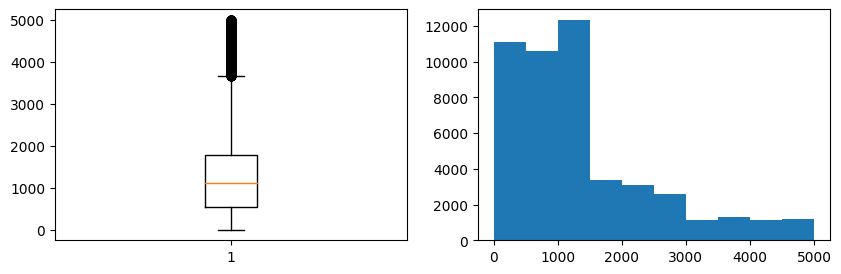

In [78]:
# Looks Alright

plt.figure(figsize=(10,3))

plt.subplot(1, 2, 1)
plt.boxplot(df.Outstanding_Debt)

plt.subplot(1, 2, 2)
plt.hist(df.Outstanding_Debt)

plt.show()

In [79]:
df.columns

Index(['Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Credit_Score'],
      dtype='object')

---

## 16. Credit_Utilization_Ratio

In [80]:
df.Credit_Utilization_Ratio.dtype

dtype('float64')

In [81]:
df.Credit_Utilization_Ratio.unique()

array([31.37786187, 27.26225871, 22.53759303, ..., 33.3599874 ,
       37.14078351, 34.19246265])

In [82]:
# Divide by 100 and round it to the 100th

df.Credit_Utilization_Ratio = df.Credit_Utilization_Ratio.map(lambda x : round(x/100, ndigits=2))

In [83]:
df.Credit_Utilization_Ratio.unique()

array([0.31, 0.27, 0.23, 0.24, 0.39, 0.35, 0.33, 0.29, 0.42, 0.38, 0.32,
       0.41, 0.26, 0.43, 0.3 , 0.28, 0.37, 0.36, 0.4 , 0.25, 0.34, 0.45,
       0.44, 0.46, 0.22, 0.21, 0.2 , 0.5 , 0.47, 0.48])

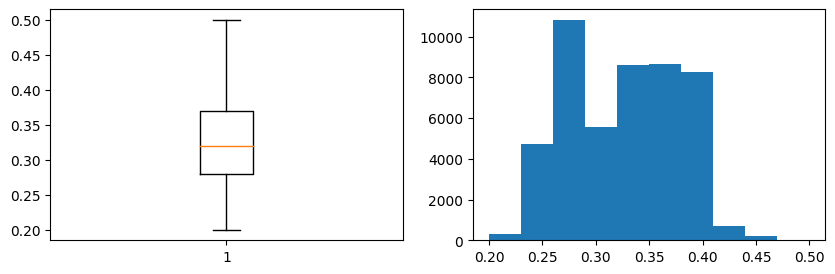

In [84]:
# Looks Good

plt.figure(figsize=(10,3))

plt.subplot(1, 2, 1)
plt.boxplot(df.Credit_Utilization_Ratio)

plt.subplot(1, 2, 2)
plt.hist(df.Credit_Utilization_Ratio)

plt.show()

---

## 17. Credit_History_Age

In [85]:
df.Credit_History_Age.head()

0    22 Years and 4 Months
1    22 Years and 6 Months
2    22 Years and 7 Months
3    26 Years and 7 Months
4    26 Years and 8 Months
Name: Credit_History_Age, dtype: object

In [86]:
# Change '00 Years and 00 Months' to integer which represents the calculated month.

df.Credit_History_Age = df.Credit_History_Age.map(lambda x : ((int(str(x).split()[0]) * 12) + int(str(x).split()[3])))

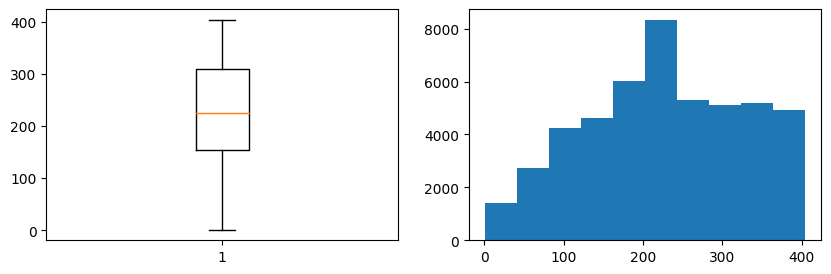

In [87]:
# Looks Good

plt.figure(figsize=(10,3))

plt.subplot(1, 2, 1)
plt.boxplot(df.Credit_History_Age)

plt.subplot(1, 2, 2)
plt.hist(df.Credit_History_Age)

plt.show()

---

## 18. Credit Score

FINALLY, THE DEPENDENT VARIABLE!

In [88]:
df.Credit_Score.unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [89]:
df.Credit_Score

0            Good
1            Good
2            Good
3        Standard
4            Good
           ...   
47895        Poor
47896        Poor
47897    Standard
47898    Standard
47899        Poor
Name: Credit_Score, Length: 47900, dtype: object

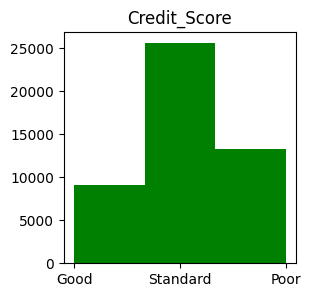

In [90]:
plt.figure(figsize=(3,3))
plt.title('Credit_Score')
plt.hist(df.Credit_Score, bins=3, color='green')

plt.show()

In [91]:
# We change the values to 0 => good and standard, 1 => poor
# This is used only for the decision tree since we want to identify 'poor' value.
# K-means clustering will use all three values.

df['Credit_Score'] = df.Credit_Score.map(lambda x: 0 if x=='Good' or x=='Standard' else 1)
df.Credit_Score

0        0
1        0
2        0
3        0
4        0
        ..
47895    1
47896    1
47897    0
47898    0
47899    1
Name: Credit_Score, Length: 47900, dtype: int64

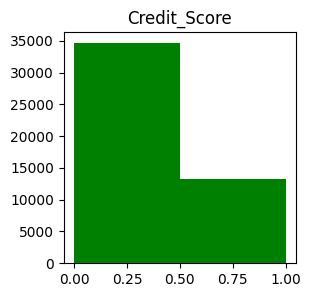

In [92]:
# Looks Good

plt.figure(figsize=(3,3))
plt.title('Credit_Score')
plt.hist(df.Credit_Score, bins=2, color='green')

plt.show()

---

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47900 entries, 0 to 47899
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       47900 non-null  int64  
 1   Annual_Income             47900 non-null  int64  
 2   Num_Bank_Accounts         47900 non-null  int64  
 3   Num_Credit_Card           47900 non-null  int64  
 4   Interest_Rate             47900 non-null  float64
 5   Num_of_Loan               47900 non-null  int64  
 6   Delay_from_due_date       47900 non-null  int64  
 7   Num_of_Delayed_Payment    47900 non-null  int64  
 8   Num_Credit_Inquiries      47900 non-null  int64  
 9   Credit_Mix                47900 non-null  object 
 10  Outstanding_Debt          47900 non-null  int64  
 11  Credit_Utilization_Ratio  47900 non-null  float64
 12  Credit_History_Age        47900 non-null  int64  
 13  Credit_Score              47900 non-null  int64  
dtypes: flo

In [94]:
# NOTE 2 Categorical Variables and 12 Numerical Variables
#      0000 Observations and No missing values

In [95]:
# df.to_csv('data/experiment.csv', index=False)

In [96]:
# pd.read_csv('data/experiment.csv')

In [97]:
df.columns

Index(['Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Credit_Score'],
      dtype='object')

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual_Income'}>,
        <Axes: title={'center': 'Num_Bank_Accounts'}>,
        <Axes: title={'center': 'Num_Credit_Card'}>],
       [<Axes: title={'center': 'Interest_Rate'}>,
        <Axes: title={'center': 'Num_of_Loan'}>,
        <Axes: title={'center': 'Delay_from_due_date'}>,
        <Axes: title={'center': 'Num_of_Delayed_Payment'}>],
       [<Axes: title={'center': 'Num_Credit_Inquiries'}>,
        <Axes: title={'center': 'Outstanding_Debt'}>,
        <Axes: title={'center': 'Credit_Utilization_Ratio'}>,
        <Axes: title={'center': 'Credit_History_Age'}>],
       [<Axes: title={'center': 'Credit_Score'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

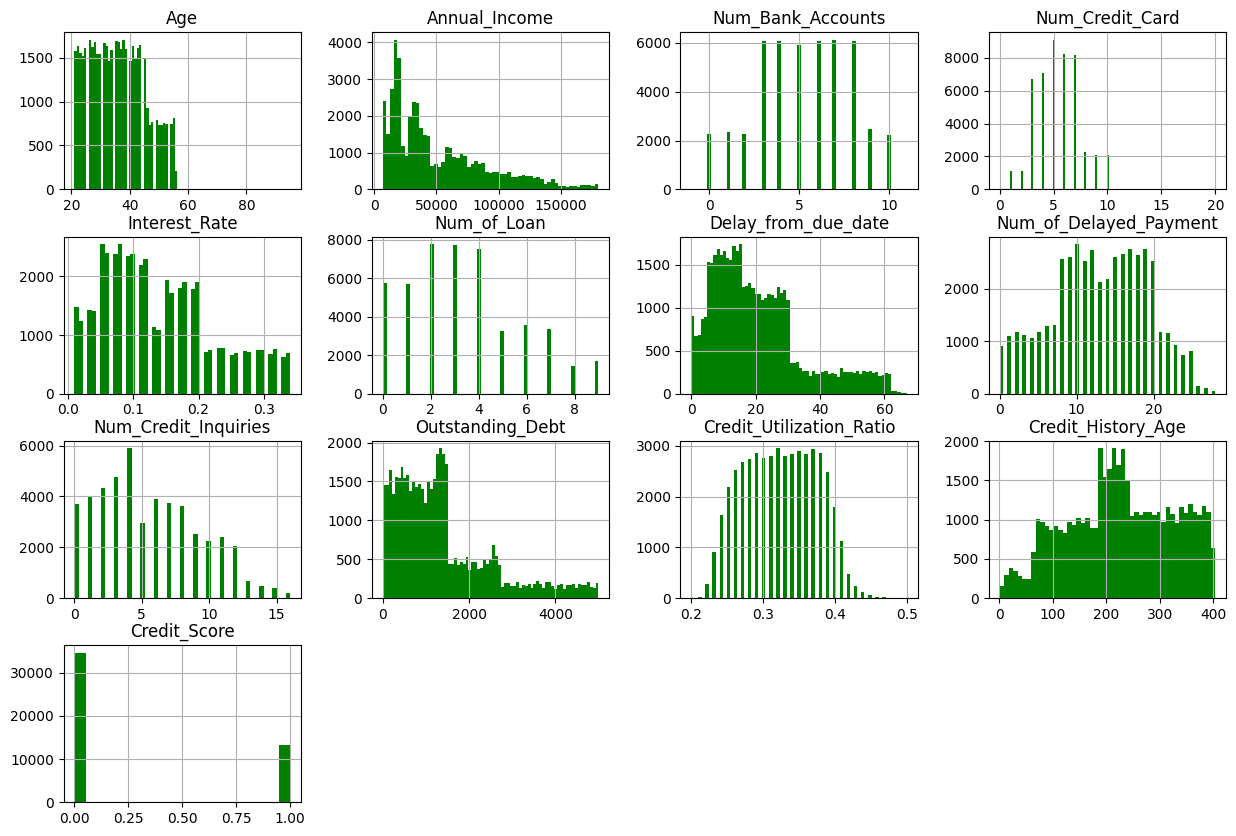

In [98]:
df.hist(bins='auto', color='green', figsize=(15, 10))

---

# Decision Tree

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn import preprocessing
from sklearn.decomposition import PCA

from sklearn.metrics import *

from sklearn import tree

#### Dummy Coding

In [100]:
# One Hot Encoder - Creating Dummy Variables for 'Credit_Mix

ohe = preprocessing.OneHotEncoder(sparse=False)

oh_encoded = ohe.fit_transform(df[['Credit_Mix']])
df_oh_encoded = pd.DataFrame(oh_encoded, columns=ohe.get_feature_names_out(['Credit_Mix']))

df = pd.concat([df, df_oh_encoded], axis=1)

df.drop(['Credit_Mix'], axis=1, inplace=True)

df.head()

/Users/davidekim/tensorflow/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Credit_Score,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard
0,23,19114,3,4,0.03,4,5,4,4,809,0.31,268,0,0.0,1.0,0.0
1,23,19114,3,4,0.03,4,8,4,4,809,0.27,270,0,0.0,1.0,0.0
2,23,19114,3,4,0.03,4,3,8,4,809,0.23,271,0,0.0,1.0,0.0
3,28,34847,2,4,0.06,1,3,4,2,605,0.24,319,0,0.0,1.0,0.0
4,28,34847,2,4,0.06,1,7,1,2,605,0.39,320,0,0.0,1.0,0.0


#### Split

In [101]:
# Separate X from y

outcome = 'Credit_Score'
predictors = list(df.columns)
predictors.remove(outcome)

X = df[predictors]
y = df[outcome]

In [102]:
# split dataset into training (70%) and test (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(33530, 15) (14370, 15) (33530,) (14370,)


#### Full Tree

In [103]:
# Full Tree

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'gini', random_state = 42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy:  0.8417536534446765
[[9265 1118]
 [1156 2831]]


In [104]:
# from sklearn.model_selection import GridSearchCV

# # We create lists of all the values we want to search over
# # This is called 'creating a grid'
# param_grid = {
#     'max_depth': range(1, 1002, 50),
#     'min_samples_leaf': [1, 10, 20, 50, 100, 200],
#     'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01],
#     'ccp_alpha': np.arange(0, 0.02, 0.002)
# }

# # Then, use the GridSearchCV function which combines gridsearch with
# # K-fold cross validation (cv parameter)
# gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10, scoring = 'accuracy', error_score='raise')
# gridSearch.fit(X_train, y_train)

# print('Best accuracy: ', gridSearch.best_score_)
# print('Parameter values to achieve best accuracy: ', gridSearch.best_params_)

# # RESULT: (Runtime: 68 minutes)
# # Best accuracy:  0.8339397554428871
# # Parameter values to achieve best accuracy:  {'ccp_alpha': 0.0, 'max_depth': 551, 'min_impurity_decrease': 0, 'min_samples_leaf': 1}

#### Reduced Tree

In [105]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'gini', random_state = 42, max_depth = 551, min_impurity_decrease = 0, min_samples_leaf = 1, ccp_alpha=0.0)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy:  0.8417536534446765
[[9265 1118]
 [1156 2831]]


In [106]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89     10383
           1       0.72      0.71      0.71      3987

    accuracy                           0.84     14370
   macro avg       0.80      0.80      0.80     14370
weighted avg       0.84      0.84      0.84     14370



In [107]:
f1_score(y_test, y_pred)

0.7134576612903226

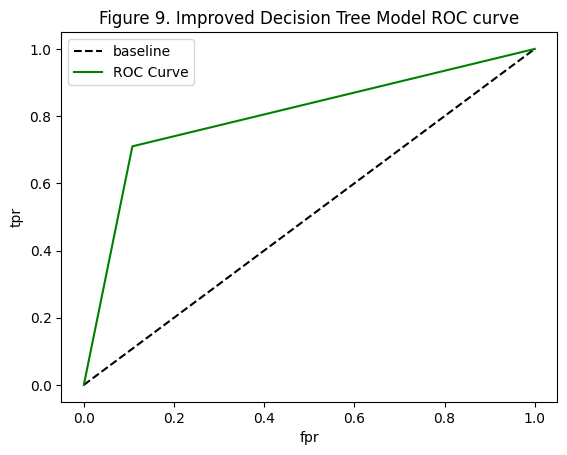

In [113]:

y_pred_proba = dt.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# plot roc curve
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, color='green')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.legend(['baseline', 'ROC Curve'])
plt.title('Figure 9. Improved Decision Tree Model ROC curve')
plt.show()

In [109]:
print('Number of nodes', dt.tree_.node_count)

Number of nodes 9017


In [110]:
# # Plot the reduced tree
# plt.figure(figsize=(25,15))
# plt.title('Figure 5. Decision Tree')
# # define class names
# tree.plot_tree(dt, fontsize=12, feature_names=X_train.columns, filled=True, class_names=['Approve', 'Reject']);
# plt.show()

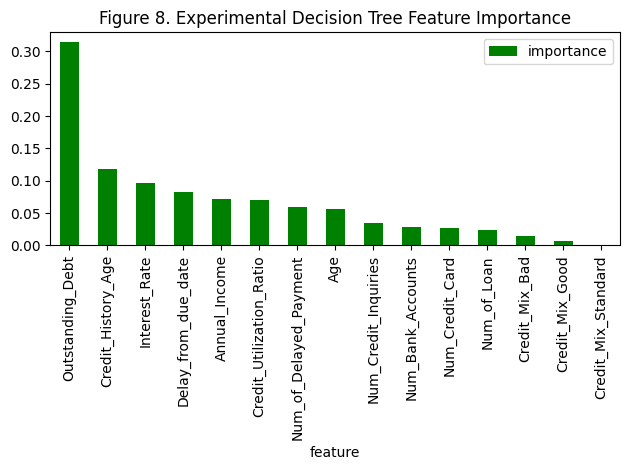

In [111]:
# Extract importance values for each feature (column of X)
importances = dt.feature_importances_

# create a dataframe to store the values and their labels
df2 = pd.DataFrame({'feature': X_train.columns, 'importance': importances})

# sort dataframe by descending order, showing the most important feature top
df2 = df2.sort_values('importance', ascending = False)

# plot the importance of each feature
ax = df2.plot(kind='bar', x='feature', color='green')

plt.title('Figure 8. Experimental Decision Tree Feature Importance')
plt.tight_layout()
plt.show()

#### Test K Means Centroids on dt model

In [112]:
c_test = pd.read_csv('data/centroid_test.csv')

y_pred = dt.predict(c_test)
y_pred

array([0, 1, 0])

## SUCCESSFUL ON INDENTIFYING THE HIGH CREDIT RISK OBSERVATION!! :)